# ATSC 500 Final Project - Comparisons of CBL height over mountainous BC

*Yingkai Sha (82627143) Department of Earth, Ocean and Atmospheric Sciences, University of Brithsh Columbia, Vancouver*


The Convective Boundary Layer (CBL)is the daytime Planetary Boundary Layer (PBL) under convective conditions. The understanding of CBL height and structure is an important part on weather forecast and air quality studies. Comparing with the flat terrain, the CBL height over mountainous area is more complex. It is known that, the advection of the thermally driven flows paly an important role on the evolution of the CBL height, however, detailed observation is very limited.

British Columbia (BC) has a long coastline and rich in mountains, the complex terrain creats difficults on the daily weather forecast. Investigating the quality of the modeled CBL height can bring a good insight on addressing the model forecst bias and benefits the post-processing of the model forecast. 

This study compares the CBL height produced by the Weather Research and Forecast (WRF) model with Cloud‐Aerosol Lidarand Infrared Pathfinder Satellite Observations (CALIPSO) in the mountainous BC. 

In [4]:
from sys import path
path.insert(0, '_libs/')

In [5]:
import numpy as np
import netCDF4 as nc
import CALIPSO_lib as Clib
import matplotlib.pyplot as plt
% matplotlib inline

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
nc_obj = nc.Dataset('_data/ATSC-500/CBL_Comparison.nc')
z = nc_obj.variables['z'][:]
groups = nc_obj.variables['group_keys'][:]
cal_CBL = nc_obj.variables['CALIPSO_CBL'][:]
cal_HGT = nc_obj.variables['CALIPSO_HGT'][:]
wrf_CBL = nc_obj.variables['WRF_CBL'][:]
wrf_HGT = nc_obj.variables['WRF_HGT'][:]
#temp_CBL = wrf_CBL

## Data and methods


### CBL heights from CALIPSO

Details [here](https://nbviewer.jupyter.org/url/bitbucket.org/yingkaisha/homework/raw/tip/ATSC%20500%20Final%20Project%20-%20CALIPSO%20file%20access%20and%20retrieval.ipynb)

Previous research shows that the downward looking lidar can well observe the evolution of CBL height and the result is consistent with temperature profiles[Emeis et al., 2008]. In this study, CALIPSO Lidar L1B Total Attenuated Backscatter product is used for retrieving the CBL height. Considering the quality of lidar profiles over mountainous area, the maximum variance method is applied. This methods shows good abilities on identifying the CBL top under clear air and partly cumulus convective cases in the previous reserach and in general over performs the maximum gradient and Haar wavelet transfrom method. [Jordan et al, 2010]

### CBL heights from WRF simulations

Details [here](https://nbviewer.jupyter.org/url/bitbucket.org/yingkaisha/homework/raw/tip/ATSC%20500%20Final%20Project%20-%20WRF%20simulation%20and%20post-processing.ipynb)

The numeric model applied in the study is WRF version 3.7.1. The simulation has a 24-hour forecast horizon with hourly output and initialized by Global Forecast System (GFS) data at 0:00 UTC time. The PBL scheme of the model is Grenier–Bretherton–McCaa (GBM). The simulation has 4 nested domains, from which the second nested domain with a 12-km grid spacing well covers the BC Province. 

The CBL height of the model forecast is interpolated onto the CALISPO footprint and the time of comparison is from November 2015 to February 2016.

Reference

Jordan, N. S., Hoff, R. M., & Bacmeister, J. T. (2010). Validation of Goddard Earth Observing System‐version 5 MERRA planetary boundary layer heights using CALIPSO. *J. Geophys. Res.*: Atmospheres, 115(D24).

Emeis, S., Schäfer, K., & Münkel, C. (2008). Surface-based remote sensing of the mixing-layer height–a review. *Meteorol. Z.*, 17(5), 621-630.

## Result and conclusion

### Quantile comparisons

A quantile comparison is done based on all the available data within the comprison date, Pearson correlation, Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) are used as metrics. Noted that, here the variable under comparison is the CBL depth, which is defined as the distance from the land surface rather than sea level to the CBL top.

In [33]:
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [21]:
HistY = cal_CBL-cal_HGT
HistX = wrf_CBL
Ybin_num = 100; Xbin_num = 100
xlim_bin=[0, 3]; ylim_bin=[0, 3]
R, MAE, RMSE = Clib.cal_verif_stats(HistX, HistY)
# 2-d hist
Y_bins = np.linspace(ylim_bin[0], ylim_bin[1], Ybin_num, dtype=np.float)
Y_edge = np.linspace(ylim_bin[0], ylim_bin[1], Ybin_num-1, dtype=np.float)
X_bins = np.linspace(xlim_bin[0], xlim_bin[1], Xbin_num, dtype=np.float)
X_edge = np.linspace(xlim_bin[0], xlim_bin[1], Xbin_num-1, dtype=np.float)
H, _, _ = np.histogram2d(HistY, HistX, bins=(Y_bins, X_bins))
XGrid, YGrid = np.meshgrid(X_edge, Y_edge)

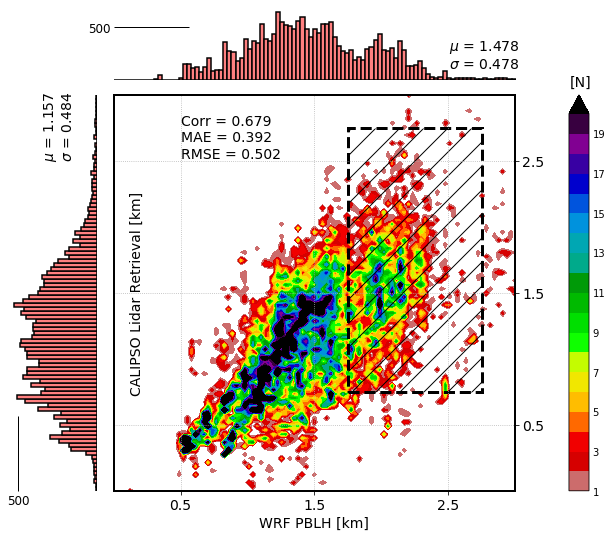

In [46]:
lev = np.arange(1, 21, 1)
# arrange axis
left=0.1; width = 0.55; bottom=0.1; height = 0.55
gap=0.02; hist_lenx=0.1; hist_leny=hist_lenx; cbar_len=0.085
# three boxes
rect_main  = [left+hist_leny+gap, bottom, width, height]
rect_histx = [left+hist_leny+gap, left+height+gap, width-cbar_len, hist_lenx]
rect_histy = [left, bottom, hist_leny, height]
fig=plt.figure(figsize=(12, 10))
axMain = plt.axes(rect_main)
axMain.yaxis.tick_right()
axMain.yaxis.set_label_position('right')
axMain.set_xlim(xlim_bin); axMain.set_ylim(ylim_bin)
axMain.set_xticks(np.arange(0.5, 3.5, 1))
axMain.set_yticks(np.arange(0.5, 3.5, 1))
axMain.set_xlabel('WRF PBLH [km]', fontsize=14)
axMain.set_ylabel('CALIPSO Lidar Retrieval [km]', labelpad=-30, fontsize=14)
axMain.yaxis.set_label_position("left")
divider = make_axes_locatable(axMain)
# grid and frame
axMain.grid() # grid on
CS = axMain.contourf(XGrid, YGrid, H, lev, cmap=plt.cm.nipy_spectral_r, extend='max')
CAx = divider.append_axes('right', size='5%', pad=0.75)
CBar = plt.colorbar(CS, cax=CAx)
CBar.set_label('[N]', labelpad=-25, y=1.05, rotation=360, fontsize=14)
CBar.ax.tick_params(axis='y', length=0, direction='in')
axMain.text(0.5, 2.5, 'Corr = {}\nMAE = {}\nRMSE = {}'\
            .format(np.around(R, 3), np.around(MAE, 3), np.around(RMSE, 3)), va='bottom', fontsize=14)
axMain.add_patch(patches.Rectangle((1.75, 0.75), 1, 2, \
            fill=False, color='k', linewidth=3.0, linestyle='--', hatch='/'))
# ========== Hist-x ========== #
axHistx = plt.axes(rect_histx)
axHistx.hist(HistX, bins=X_bins, color=[1, .5, .5], edgecolor='k', lw=1.5)
axHistx.text(2.5, 250, '$\mu$ = {}\n$\sigma$ = {}'.format(np.around(HistX.mean(), 3), np.around(HistX.std(), 3)), \
             fontsize=14, va='center')
axHistx.set_xlim(xlim_bin)
axHistx.set_yticks([500])
axHistx.axes.get_xaxis().set_visible(False)
# ========== Hist-y ========== #
axHisty = plt.axes(rect_histy)
axHisty.hist(HistY, bins=Y_bins, color=[1, .5, .5], edgecolor='k', lw=1.5, orientation='horizontal')
axHisty.text(250, 2.5, '$\mu$ = {}\n$\sigma$ = {}'.format(np.around(HistY.mean(), 3), np.around(HistY.std(), 3)), \
             fontsize=14, ha='center', va='bottom', rotation='vertical')
axHisty.set_ylim(ylim_bin)
axHisty.set_xticks([500])
axHisty.invert_xaxis()
axHisty.axes.get_yaxis().set_visible(False)
AX = [axMain, axHistx, axHisty]
for ax in AX:
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    [i.set_linewidth(2) for i in ax.spines.values()]
for ax in AX[1:]:
    ax.grid(False)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
axMain.grid(linestyle=':')
axHistx.tick_params(bottom="off", labelbottom="off", left="on", labelleft="on", length=75, direction='in', width=1.0)
axHisty.tick_params(bottom="on", labelbottom="on", left="off", labelleft="off", length=75, direction='in', width=1.0)

The CALIPSO lidar CBL retrieval is in general consistant with the WRF simulation, with a significant correlation of 0.68. The two CBL depths agree well within the range of 0 to 1.5 km. For the modeled CBL depth larger than 1.5 km (hatched region in the figure above), an overestimation of above 250 m can be found. This overestimation can also be seen from the two histograms with expectation and standard diviation values.

### Conclusions based on given examples

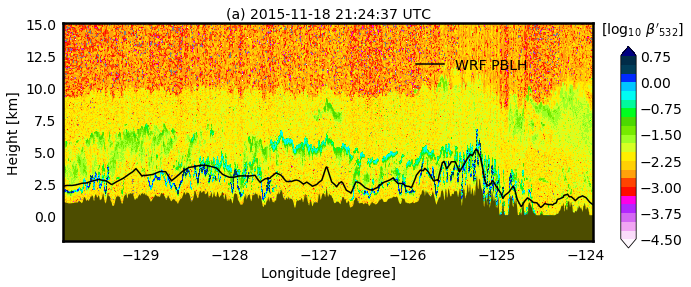

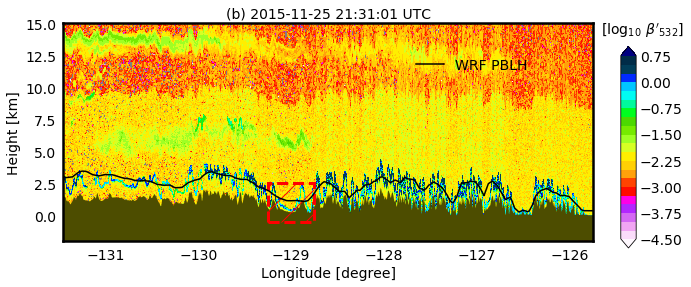

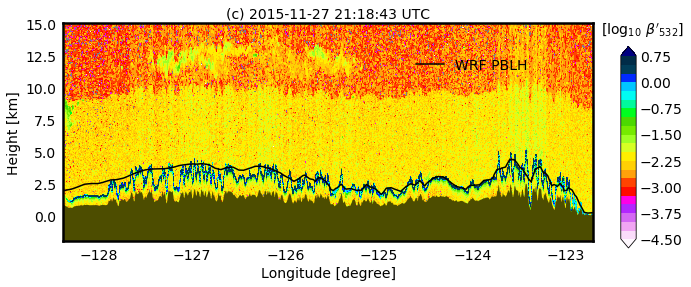

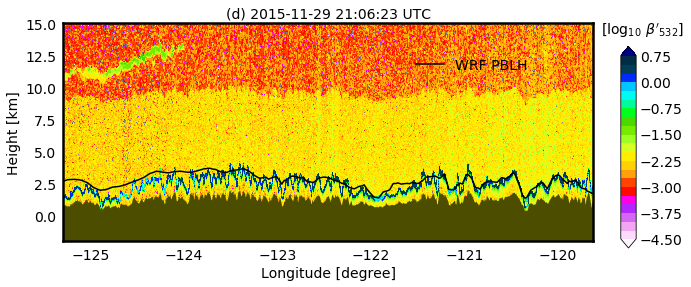

In [56]:
tab_lev = np.arange(-4.5, 1.0, 0.25)
suffix = ['(a)', '(b)', '(c)', '(d)']
for i, group in enumerate(groups):
    ind = np.nan
    temp_group = nc_obj.groups[group]
    TAB532 = temp_group.variables['TAB532'][:]
    CBL_CAL = temp_group.variables['CBL_H'][:]
    CBL_WRF = temp_group.variables['CBL_WRF'][:]
    HGT_WRF = temp_group.variables['HGT_WRF'][:]
    lon_temp = temp_group.variables['Longitude'][:]
    elev_temp = temp_group.variables['Elevation'][:]
    title = suffix[i]+' '+Clib.CALIPSO_to_datetime(temp_group.variables['Time_UTC'][:].mean()).\
            strftime('%Y-%m-%d %H:%M:%S')+' UTC'
    fig, ax = Clib.CALIPSO_plot(z, lon_temp, elev_temp, np.log10(TAB532), ind, tab_lev, title)
    ax.plot(lon_temp, CBL_WRF+HGT_WRF, 'k-', label='WRF PBLH')
    LG = ax.legend(bbox_to_anchor=(0.9, 0.9), prop={'size':14}); LG.draw_frame(False)
    if i == 1:
        ax.add_patch(patches.Rectangle((-129.25, -0.5), 0.5, 3, \
            fill=False, color='r', linewidth=3.0, linestyle='--', hatch='/'))

In order to understand in which case the overestimation in the quantile comparison can happen, four modeled CBL hieghts in November 2015 are shown (black lines) with their correspond CALIPSO lidar profiles (color shades). From the example, it is clear that the model overestimates the CBL height over valley type terrain (e.g. the hatched region in b). 

A key for this overestimation in the valley is the smoothed terrain in the model simulation. The smoothing may cause the valley in the model higher than the real world, and the modeled CBL height growth is therefore closer to a flat terrain regime in which the CBL development is dominated by the daytime surface heating process[De wekker and Kossmann, 2015]. If the subsidence heating or horizontal heat transfer also effects the valley CBL growth in this case, then the along-slope cold air advection which supress the CBL growth may not be well counted by the model. Sensitivity tests with real and smoothed valleys can be an effective way to investigate this assumption, the signal of cold air advection can be identified from the temperature profiles on the slope of the valley.

Reference

De Wekker, S. F., & Kossmann, M. (2015). Convective boundary layer heights over mountainous terrain—a review of concepts. *Front. Earth Sci.*, 3, 77.